In [48]:
import searchtweets
import pandas as pd
import json
import time as t
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, time

In [222]:
search_args = searchtweets.load_credentials(filename="./creds.yaml",
                 yaml_key="search_tweets_api_4",
                 env_overwrite=False)
date_s = datetime(2020, 4, 10)
date_u = date_s + timedelta(days=1)
for i in range(5):
    rule = searchtweets.gen_rule_payload("(viroloog OR doden OR cijfers OR veiligheidsraad OR overleden OR positief getest OR vanranst OR vangucht) lang:nl place_country:BE", results_per_call=100, from_date = date_s.strftime("%Y%m%d%H%M"), to_date = date_u.strftime("%Y%m%d%H%M"))
    try:
        tweets = searchtweets.collect_results(rule,
                         max_results=500,
                         result_stream_args=search_args)
        with open(date_s.strftime("%Y%m%d")+'_2.json', 'w') as file:
            for tweet in tweets:
                json.dump(tweet, file)
                file.write('\n')
        print(tweets[0]['created_at'])
        print('Count: {}'.format(str(len(tweets))))
    except:
        print('Error')
    date_s = date_u
    date_u = date_s + timedelta(days=1)
    t.sleep(10)

Grabbing bearer token from OAUTH


Fri Apr 10 23:35:48 +0000 2020
Count: 22
Sat Apr 11 21:31:53 +0000 2020
Count: 27
Sun Apr 12 23:45:40 +0000 2020
Count: 36
Mon Apr 13 21:36:06 +0000 2020
Count: 31
Tue Apr 14 22:49:36 +0000 2020
Count: 29


In [16]:
d = 'Wed Mar 11 22:08:43 +0000 2020'
tt = t.strptime(d, '%a %b %d %H:%M:%S %z %Y')
t.strftime('%H:%M:%S', tt)

'22:08:43'

In [22]:
def estimate_loc(bbox):
    print(bbox)
    return (bbox[0][0][0]+bbox[0][2][0])/2 , (bbox[0][0][1]+bbox[0][2][1])/2

In [20]:
col_names = ['date', 'id', 'text', 'time', 'retweeted', 'favorite_count', 'retweet_count', 'reply_count', 'verified_user', 'location_name', 'location_lat', 'location_lon']


In [42]:
data = []
date_s = datetime(2020, 3, 11)
date_u = date_s + timedelta(days=1)

for i in range(58):
    num = 0
    with open(date_s.strftime("%Y%m%d")+'.json', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            text = ''
            time = t.strptime(tweet['created_at'], '%a %b %d %H:%M:%S %z %Y')
            if tweet['place'] is not None:
                lon, lat = estimate_loc(tweet['place']['bounding_box']['coordinates'])
                place_name = tweet['place']['name']
            else:
                place_name = tweet['user']['location']
                lon, lat = None, None
            if 'extended_tweet' in tweet:
                text = tweet['extended_tweet']['full_text']
            else:
                text = tweet['text']
            
            data.append([date_s.strftime("%Y%m%d"), tweet['id_str'], tweet['text'], t.strftime('%H:%M:%S', time), 'retweeted_status' in tweet, tweet['favorite_count'], tweet['retweet_count'], tweet['reply_count'], tweet['user']['verified'], place_name , lat, lon])
    date_s = date_u
    date_u = date_s + timedelta(days=1)


[[[2.840255, 51.184589], [2.840255, 51.243528], [3.003745, 51.243528], [3.003745, 51.184589]]]
[[[4.028554, 50.86458], [4.028554, 50.911526], [4.089629, 50.911526], [4.089629, 50.86458]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.579764, 50.979531], [3.579764, 51.187961], [3.84936, 51.187961], [3.84936, 50.979531]]]
[[[3.579764, 50.979531], [3.579764, 51.187961], [3.84936, 51.187961], [3.84936, 50.979531]]]
[[[2.840255, 51.184589], [2.840255, 51.243528], [3.003745, 51.243528], [3.003745, 51.184589]]]
[[[4.028554, 50.86458], [4.028554, 50.911526], [4.089629, 50.911526], [4.089629, 50.86458]]]
[[[4.658977, 50.998618], [4.658977, 51.127531], [4.818248, 51.127531], [4.818248, 50.998618]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.6699, 50.928488], [4.6699, 50.986236], [4.803595, 50.986236], [4.803595, 50.928488]]]
[[[4.370328, 50.991188], [4.370328, 51.078574], [4.548736, 51.

[[[3.699342, 50.747677], [3.699342, 50.847386], [3.8199, 50.847386], [3.8199, 50.747677]]]
[[[4.313989, 50.796328], [4.313989, 50.913706], [4.436947, 50.913706], [4.436947, 50.796328]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.803644, 50.727613], [3.803644, 50.837028], [4.003897, 50.837028], [4.003897, 50.727613]]]
[[[3.928356, 51.004136], [3.928356, 51.073998], [4.041868, 51.073998], [4.041868, 51.004136]]]
[[[3.699342, 50.747677], [3.699342, 50.847386], [3.8199, 50.847386], [3.8199, 50.747677]]]
[[[3.699342, 50.747677], [3.699342, 50.847386], [3.8199, 50.847386], [3.8199, 50.747677]]]
[[[3.699342, 50.747677], [3.699342, 50.847386], [3.8199, 50.847386], [3.8199, 50.747677]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.39463, 50.789795], [4.39463, 50.827108], [4.482037, 50.827108], [4.482037, 50.789795]]]
[[[4.596891, 51.122481], [4.596891, 51.180988], [4.720552, 51.180988

[[[4.347341, 50.800721], [4.347341, 50.84062], [4.403387, 50.84062], [4.403387, 50.800721]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.823199, 51.017376], [3.823199, 51.075829], [3.938131, 51.075829], [3.938131, 51.017376]]]
[[[4.503113, 50.990128], [4.503113, 51.046894], [4.634806, 51.046894], [4.634806, 50.990128]]]
[[[3.747029, 50.810058], [3.747029, 50.918338], [3.866798, 50.918338], [3.866798, 50.810058]]]
[[[3.747029, 50.810058], [3.747029, 50.918338], [3.866798, 50.918338], [3.866798, 50.810058]]]
[[[3.267325, 50.818058], [3.267325, 50.907106], [3.350135, 50.907106], [3.350135, 50.818058]]]
[[[2.840255, 51.184589], [2.840255, 51.243528], [3.003745, 51.243528], [3.003745, 51.184589]]]
[[[3.453598, 50.703532], [3.453598, 50.771271], [3.547853, 50.771271], [3.547853, 50.703532]]]
[[[4.244101, 50.806981], [4.244101, 50.850241], [4.340266, 50.850241], [4.340266, 50.806981]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.4

[[[3.320151, 50.84506], [3.320151, 50.914357], [3.476522, 50.914357], [3.476522, 50.84506]]]
[[[3.305351, 50.737454], [3.305351, 50.828222], [3.457939, 50.828222], [3.457939, 50.737454]]]
[[[5.513437, 50.763436], [5.513437, 50.843229], [5.687828, 50.843229], [5.687828, 50.763436]]]
[[[3.331299, 51.016438], [3.331299, 51.122519], [3.525382, 51.122519], [3.525382, 51.016438]]]
[[[4.244101, 50.806981], [4.244101, 50.850241], [4.340266, 50.850241], [4.340266, 50.806981]]]
[[[4.370328, 50.991188], [4.370328, 51.078574], [4.548736, 51.078574], [4.548736, 50.991188]]]
[[[4.152627, 51.16655], [4.152627, 51.352944], [4.321873, 51.352944], [4.321873, 51.16655]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.22515, 51.296129], [3.22515, 51.370214], [3.384867, 51.370214], [3.384867, 51.296129]]]
[[[3.541154, 50.790046], [3.541154, 50.903869], [3.697461, 50.903869], [3.697461, 50.790046]]]
[[[4.455441, 51.235579], [4.455441, 51.304431], [4.55281

[[[4.598475, 50.985325], [4.598475, 51.024105], [4.709548, 51.024105], [4.709548, 50.985325]]]
[[[3.104251, 51.276383], [3.104251, 51.323417], [3.176893, 51.323417], [3.176893, 51.276383]]]
[[[5.212106, 50.867728], [5.212106, 50.981527], [5.414559, 50.981527], [5.414559, 50.867728]]]
[[[4.774005, 50.95337], [4.774005, 51.037652], [4.93697, 51.037652], [4.93697, 50.95337]]]
[[[3.820629, 50.951465], [3.820629, 51.02839], [3.922893, 51.02839], [3.922893, 50.951465]]]
[[[4.379667, 51.415275], [4.379667, 51.482376], [4.547779, 51.482376], [4.547779, 51.415275]]]
[[[3.200484, 50.730925], [3.200484, 50.874597], [3.359104, 50.874597], [3.359104, 50.730925]]]
[[[4.96964, 50.8455], [4.96964, 50.932805], [5.092163, 50.932805], [5.092163, 50.8455]]]
[[[4.071182, 50.967041], [4.071182, 51.02177], [4.168879, 51.02177], [4.168879, 50.967041]]]
[[[2.769108, 50.793679], [2.769108, 50.93843], [2.976528, 50.93843], [2.976528, 50.793679]]]
[[[2.94293, 51.214374], [2.94293, 51.260565], [3.012961, 51.260565

[[[2.769108, 50.793679], [2.769108, 50.93843], [2.976528, 50.93843], [2.976528, 50.793679]]]
[[[4.928138, 51.352676], [4.928138, 51.48738], [5.104889, 51.48738], [5.104889, 51.352676]]]
[[[4.035191, 50.74543], [4.035191, 50.816255], [4.151935, 50.816255], [4.151935, 50.74543]]]
[[[5.043399, 50.779113], [5.043399, 50.884729], [5.151819, 50.884729], [5.151819, 50.779113]]]
[[[3.200484, 50.730925], [3.200484, 50.874597], [3.359104, 50.874597], [3.359104, 50.730925]]]
[[[3.061561, 50.886967], [3.061561, 50.993866], [3.178524, 50.993866], [3.178524, 50.886967]]]
[[[3.22515, 51.296129], [3.22515, 51.370214], [3.384867, 51.370214], [3.384867, 51.296129]]]
[[[4.347341, 50.800721], [4.347341, 50.84062], [4.403387, 50.84062], [4.403387, 50.800721]]]
[[[4.347341, 50.800721], [4.347341, 50.84062], [4.403387, 50.84062], [4.403387, 50.800721]]]
[[[4.347341, 50.800721], [4.347341, 50.84062], [4.403387, 50.84062], [4.403387, 50.800721]]]
[[[4.928138, 51.352676], [4.928138, 51.48738], [5.104889, 51.487

[[[4.632015, 50.790991], [4.632015, 50.852402], [4.746429, 50.852402], [4.746429, 50.790991]]]
[[[4.658977, 50.998618], [4.658977, 51.127531], [4.818248, 51.127531], [4.818248, 50.998618]]]
[[[3.010447, 50.829035], [3.010447, 50.829035], [3.010447, 50.829035], [3.010447, 50.829035]]]
[[[4.448059, 50.793826], [4.448059, 50.867575], [4.586334, 50.867575], [4.586334, 50.793826]]]
[[[2.840255, 51.184589], [2.840255, 51.243528], [3.003745, 51.243528], [3.003745, 51.184589]]]
[[[3.98255, 50.899306], [3.98255, 50.994883], [4.164221, 50.994883], [4.164221, 50.899306]]]
[[[4.294144, 50.864606], [4.294144, 50.894132], [4.340627, 50.894132], [4.340627, 50.864606]]]
[[[4.666505, 51.375646], [4.666505, 51.505081], [4.850713, 51.505081], [4.850713, 51.375646]]]
[[[4.748374, 50.852066], [4.748374, 50.911786], [4.910717, 50.911786], [4.910717, 50.852066]]]
[[[4.152627, 51.16655], [4.152627, 51.352944], [4.321873, 51.352944], [4.321873, 51.16655]]]
[[[4.326331, 51.297167], [4.326331, 51.356635], [4.416

[[[2.9377, 50.800175], [2.9377, 50.928711], [3.069752, 50.928711], [3.069752, 50.800175]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.515227, 50.8561], [4.515227, 50.934849], [4.614839, 50.934849], [4.614839, 50.8561]]]
[[[4.640395, 50.824111], [4.640395, 50.943981], [4.770378, 50.943981], [4.770378, 50.824111]]]
[[[2.769108, 50.793679], [2.769108, 50.93843], [2.976528, 50.93843], [2.976528, 50.793679]]]
[[[3.996711, 50.985141], [3.996711, 51.072214], [4.194053, 51.072214], [4.194053, 50.985141]]]
[[[4.888755, 51.262614], [4.888755, 51.395349], [4.984693, 51.395349], [4.984693, 51.262614]]]
[[[4.391684, 51.292721], [4.391684, 51.364527], [4.518281, 51.364527], [4.518281, 51.292721]]]
[[[3.98255, 50.899306], [3.98255, 50.994883], [4.164221, 50.994883], [4.164221, 50.899306]]]
[[[2.748097, 51.094848], [2.748097, 51.199562], [2.923915, 51.

[[[4.503113, 50.990128], [4.503113, 51.046894], [4.634806, 51.046894], [4.634806, 50.990128]]]
[[[4.640395, 50.824111], [4.640395, 50.943981], [4.770378, 50.943981], [4.770378, 50.824111]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.382916, 50.792406], [3.382916, 50.86609], [3.514618, 50.86609], [3.514618, 50.792406]]]
[[[3.728238, 50.894785], [3.728238, 50.977013], [3.850781, 50.977013], [3.850781, 50.894785]]]
[[[3.331299, 51.016438], [3.331299, 51.122519], [3.525382, 51.122519], [3.525382, 51.016438]]]
[[[3.360593, 51.146735], [3.360593, 51.274459], [3.544993, 51.274459], [3.544993, 51.146735]]]
[[[4.596891, 51.122481], [4.596891, 51.180988], [4.720552, 51.180988], [4.720552, 51.122481]]]
[[[3.040102, 51.144113], [3.040102, 51.237951], [3.1

[[[4.05945, 51.17534], [4.05945, 51.292944], [4.166528, 51.292944], [4.166528, 51.17534]]]
[[[4.596891, 51.122481], [4.596891, 51.180988], [4.720552, 51.180988], [4.720552, 51.122481]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.888755, 51.262614], [4.888755, 51.395349], [4.984693, 51.395349], [4.984693, 51.262614]]]
[[[4.440425, 51.268637], [4.440425, 51.351379], [4.558809, 51.351379], [4.558809, 51.268637]]]
[[[4.640395, 50.824111], [4.640395, 50.943981], [4.770378, 50.943981], [4.770378, 50.824111]]]
[[[3.579764, 50.979531], [3.579764, 51.187961], [3.84936, 51.187961], [3.84936, 50.979531]]]
[[[2.958862, 50.916011], [2.958862, 50.999303], [3.088467, 50.999303], [3.088467, 50.916011]]]
[[[4.340333, 51.080433], [4.340333, 51.106103], [4.40543, 51.106103], [4.40543, 51.080433]]]
[[[3.040102, 51.144113], [3.040102, 51.237951], [3.161872, 51.237951], [3.161872, 51.144113]]]
[[[3.134113, 51.158168], [3.134113, 51.363298], [3.310214,

[[[5.320299, 51.163456], [5.320299, 51.246077], [5.443035, 51.246077], [5.443035, 51.163456]]]
[[[3.937426, 50.858594], [3.937426, 50.916334], [4.041856, 50.916334], [4.041856, 50.858594]]]
[[[3.867472, 50.947401], [3.867472, 50.987236], [4.024119, 50.987236], [4.024119, 50.947401]]]
[[[4.290196, 51.185182], [4.290196, 51.261482], [4.357263, 51.261482], [4.357263, 51.185182]]]
[[[4.294144, 50.864606], [4.294144, 50.894132], [4.340627, 50.894132], [4.340627, 50.864606]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[3.200484, 50.730925], [3.200484, 50.874597], [3.359104, 50.874597], [3.359104, 50.730925]]]
[[[4.218084, 51.143464], [4.218084, 51.377649], [4.498296, 51.377649], [4.498296, 51.143464]]]
[[[4.313989, 50.796328], [4.313989, 50.913706], [4.436947, 50.913706], [4.436947, 50.796328]]]
[[[5.043399, 50.779113], [5.043399, 50.884729], [5.151819, 50.884729], [5.151819, 50.779113]]]
[[[3.762922, 50.971375], [3.762922, 51.030852], [3

In [43]:
df = pd.DataFrame(data=data, columns=col_names)

In [78]:
df.to_csv('tweets.csv')

In [45]:
locs = df[df['location_lat'].notna()]

In [46]:
locs

,date,id,text,time,retweeted,favorite_count,retweet_count,reply_count,verified_user,location_name,location_lat,location_lon
0,20200311,1237879827773804545,"@roelvanmaercke Roel, overleven vn covid-19, t...",23:15:24,False,13,0,2,False,Ostend,51.214059,2.922000
1,20200311,1237875536807882754,Mijn collega Kurt Barbé:\n“Men hoeft niet te w...,22:58:21,False,4,3,0,False,Denderleeuw,50.888053,4.059092
2,20200311,1237869570192334851,"100 keer per dag hoor ik zeggen: ""Handen wasse...",22:34:38,False,4,0,1,False,Antwerp,51.260556,4.358190
3,20200311,1237864826128478208,"Ondertussen heeft @DanieleRugani, speler van @...",22:15:47,False,1,0,0,False,Ghent,51.083746,3.714562
4,20200311,1237863661445627907,@WilliamWilde2 Ik hoorde van doorgaans weling...,22:11:09,False,0,0,0,False,Ghent,51.083746,3.714562
5,20200311,1237863321178476549,Enigste wat ik nog hoor is ‘corona’\nKom er ge...,22:09:48,False,0,0,0,False,Ostend,51.214059,2.922000
6,20200311,1237863045570760704,Voor de perfectionisten onder ons: je kan de c...,22:08:43,False,1,0,2,False,Denderleeuw,50.888053,4.059092
7,20200311,1237862460054364163,@Marliesvdwalle Wij hebben op aangeven van onz...,22:06:23,False,0,0,0,False,Heist-op-den-Berg,51.063074,4.738613
8,20200311,1237858877795897344,Wat leren we #vrtnws @vrtnws over de #Corona p...,21:52:09,False,38,10,3,False,Antwerp,51.260556,4.358190
9,20200311,1237856464108052481,Alsook alle @MangoLIGB workshops &amp; @LIGB_K...,21:42:33,False,9,2,0,False,Rotselaar,50.957362,4.736747


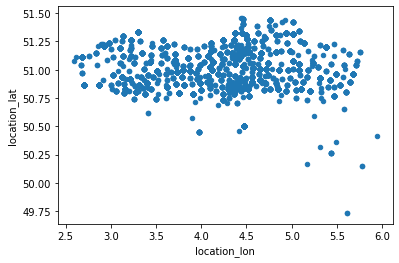

In [49]:
fig,ax = plt.subplots()
locs.plot.scatter(x='location_lon',y='location_lat',ax=ax)
plt.show()

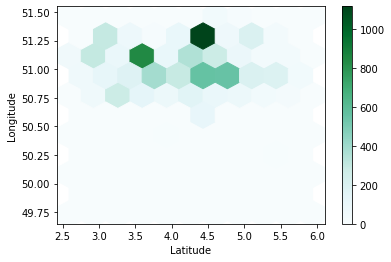

In [77]:
fig, ax = plt.subplots()
locs.plot.hexbin(x='location_lon',y='location_lat', gridsize=10,ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

In [69]:
df.sort_values('retweet_count', ascending=False)

,date,id,text,time,retweeted,favorite_count,retweet_count,reply_count,verified_user,location_name,location_lat,location_lon
1250,20200315,1239102208119132160,Heel deze corona crisis heeft mij één ding gel...,08:12:42,False,6367,1485,61,False,Antwerp,51.260556,4.358190
5450,20200412,1249406084026118144,de eerste dag na de lockdown https://t.co/Fu4V...,18:36:37,False,1919,869,2,False,Antwerp,51.260556,4.358190
964,20200314,1238767046596407296,"Ik heb daarnet met wat water, peper en zeep aa...",10:00:53,False,2835,741,33,False,Ghent,51.083746,3.714562
2462,20200321,1241472052189712384,Het einde van corona vieren gaat leuker worden...,21:09:37,False,1244,628,1,False,Malle,51.284651,4.705193
2040,20200318,1240180352360108032,We mogen nog steeds buiten om te sporten. Dit ...,07:36:52,False,2601,569,38,False,Gavere,50.929403,3.690015
5548,20200412,1249238062149877766,Na 2 zonnige dagen: wijnproeverij &amp; straat...,07:28:58,False,1156,337,44,False,Antwerp,51.260556,4.358190
5995,20200416,1250714832527114241,Stappenplan voor mensen die de festivals gaan ...,09:17:07,False,1563,293,47,False,Antwerp,51.260556,4.358190
2222,20200319,1240534691763142657,Van een vriend in een ziekenhuis: “Er worden k...,07:04:53,False,320,156,13,False,Ghent,51.083746,3.714562
4127,20200331,1244877664269238273,Mijn vrouw is hoofdverpleegkundige in een Univ...,06:42:18,False,361,127,19,False,Boom,51.093268,4.372882
1812,20200317,1239804574397075457,"De vraag is niet of er een lockdown komt, maar...",06:43:39,False,701,125,62,False,Vilvoorde,50.928303,4.424028
